Ejercicio 1:
--
Encontrar el poliedro asociado al siguiente programa lineal.
$$
\begin{align*}
    &\max 8x + 6y \\
    \text{s.r.} \\
    &5x + 3y \leq 30 \\
    &2x + 3y \leq 24 \\
    &x + 3y \leq 18 \\
    &x,y \geq 0
\end{align*}
$$

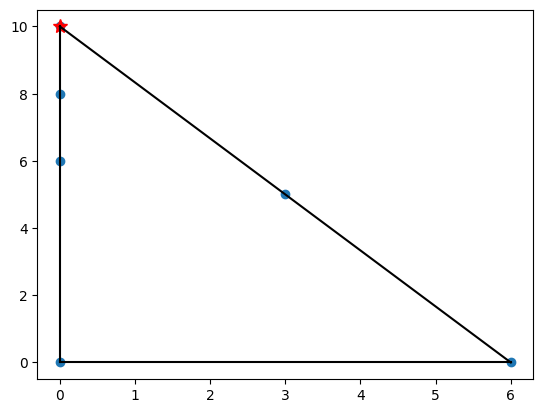

In [1]:
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt

Vertices = []
x = np.arange(0, 30, 0.01)
y = {0:(30 - 5*x)/3, 
     1:(24 - 2*x)/3,
     2:(18-x)/3,
     3: 0*x
     }
for i in range(4):
    for j in range(i+1,4):
        idx = np.argwhere(np.diff(np.sign(y[i] - y[j]))).flatten()
        if len(idx) != 0:
            x_0 = x[idx][1]
            y_0 = y[i][idx][1]
            if 5*x_0 + 3*y_0 <=30 and 2*x_0 +3*y_0<= 24 and x_0+3*y_0 <= 18 and x_0 >= 0 and y_0 >= 0:
                Vertices.append([x_0, y_0])
Vertices += [[0,30/3],[0,24/3],[0,18/3],[0,0]]
Vertices = np.array(Vertices)

hull = ConvexHull(Vertices)

plt.plot(Vertices[:,0], Vertices[:,1], 'o')
plt.plot([0], [10], 'r',linewidth = 0,marker = '*',  markersize=10, label=r'$(x*,y*)$')

for simplex in hull.simplices:
    plt.plot(Vertices[simplex, 0], Vertices[simplex, 1], 'k-')
plt.show()



Ejercicio 2:
--

Que pasa si la región es no acotada..._????

Por ejemplo, el siguiente LP tiene una región factible no acotada.

$$
\begin{align*}
    \min x + y \\
    x + 2y \geq 5\\
    4x + y \geq 6
\end{align*}
$$

cómo podemos graficar la región factible... ??? 

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


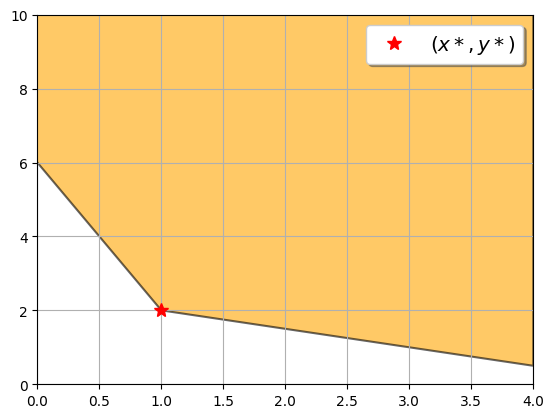

In [2]:
import numpy as np
import polytope as pc

A = np.array([ [-1,-2],[-4,-1],[1,0],[0,1] ])
b = np.array([-5,-6,4,10])
politopo = pc.Polytope(A,b)
politopo.plot(color='orange',alpha=0.6,linestyle='-',linewidth = 1.5)
plt.xlim(0,4)
plt.ylim(0,10)
plt.plot([1], [2], 'r',linewidth = 0,marker = '*',  markersize=10, label=r'$(x*,y*)$')
plt.grid()
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

Ejercicio 3:
--
Encontrar el poliedro asociado al siguiente programa lineal.
$$
\begin{align*}
    &\max 8x + 6y + 3z \\
    \text{s.r.} \\
    &5x + 3y \leq 30 \\
    &2x + 3y + z \leq 24 \\
    &x + 3y - 2z \leq 18 \\
    &x,y,z \geq 0
\end{align*}
$$

Single polytope 
  [[ 0.85749  0.5145   0.     ] |    [[5.14496]
   [ 0.53452  0.80178  0.26726] |     [6.41427]
   [ 0.26726  0.80178 -0.53452] x <=  [4.8107 ]
   [-1.       0.       0.     ] |     [0.     ]
   [ 0.      -1.       0.     ] |     [0.     ]
   [ 0.       0.      -1.     ]]|     [0.     ]]



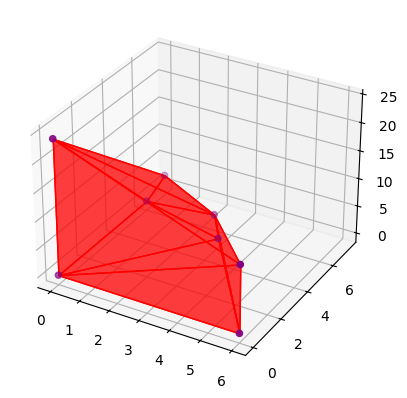

In [3]:
import numpy as np
import polytope as pc
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from scipy.spatial import ConvexHull

A = np.array([ [5,3,0],[2,3,1],[1,3,-2],[-1,0,0],[0,-1,0],[0,0,-1] ])
b = np.array([30,24,18,0,0,0])
politopo = pc.Polytope(A,b)
print(politopo)
Vertices = pc.extreme(politopo)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
hull = ConvexHull(Vertices)
# draw the polygons of the convex hull
for s in hull.simplices:
       tri = Poly3DCollection([Vertices[s]])
       tri.set_color('r')
       tri.set_alpha(0.5)
       ax.add_collection3d(tri)
# draw the vertices
ax.scatter(Vertices[:, 0], Vertices[:, 1], Vertices[:, 2], marker='o', color='purple')
plt.show()
